<a href="https://colab.research.google.com/github/Akshay069/Yes-bank-stock-closing-price-prediction/blob/main/Yes_Bank_Closing_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**

---



---


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.



###**Data Overview**

---
Fisrt things first\
Data is nothing but a information so,
I will first load data into Pandas DataFrame and take a tour of our data on the basis of which we will take decisions.


In [50]:
# Lets call out some important liabraries which i will going to use un this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
# Lets mount google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Lets call data using Pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Machine Learning/Supervised Learning/Capston Project/Copy of data_YesBank_StockPrices.csv')

In [4]:
# Shape of dataset.
print('* Number of obervations are', df.shape[0])
print('* Number of features are', df.shape[1])

* Number of obervations are 185
* Number of features are 5


In [5]:
# Lets take a first look at our data.
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


As we see above there are only five features in our dataset and only 185 observations. we will see the descriptions about all the features below on by one.


**Date:** It denotes the month & year with respect to the price of the stock.

**Open:** The price at which a stock started trading that month.

**High:** Refers to the maximum price of the stock.

**Low:** Refers to the minimum price of the stock.

**Close:** Refers to the final trading price for that month.

**'Close' is the dependent variable in this case as we are going to predict the closing price of the stock**

In [6]:
# Lets have a look at overall summary of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


From above we can see that there is no null value present in our dataset.\
also the dtype(data type) of 'date' coulmn is in object so we have to convert it into datetime fromat  

In [7]:
# before doing any manipulation to our dataset, Lets make a copy of it in order to keep original dataset intact.
df_copy = df.copy()

In [8]:
df_copy['Date'][0]

'Jul-05'

We can see that date contain string values in it. Lets convert it into datetime format

In [9]:
from datetime import datetime
df_copy['Date'] = df_copy['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


We can see above, we have successfully converted date into datetime format

In [11]:
# Lets see if any duplicated values are there in our dataset.
df_copy.duplicated().sum()

0

We can see that we don't have any duplicate values in our dataset.

In [12]:
# Descriptive summary 
round(df_copy.describe(),2)

,Open,High,Low,Close
count,185.00,185.00,185.00,185.00
mean,105.54,116.10,94.95,105.20
std,98.88,106.33,91.22,98.58
min,10.00,11.24,5.55,9.98
25%,33.80,36.14,28.51,33.45
50%,62.98,72.55,58.00,62.54
75%,153.00,169.19,138.35,153.30
max,369.95,404.00,345.50,367.90


There is a high difference between mean and median values in each column which indicates that the dataset is skewed.

###**Exploratory Data Analysis.**

---



In [13]:
# Lets seperate dependent and independent variables 
X = df_copy.drop(['Close','Date'], axis=1)
Y = df_copy['Close']

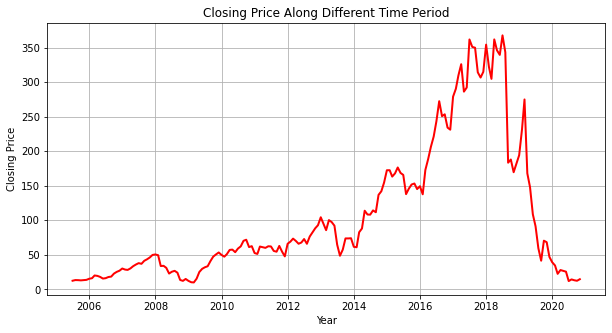

In [14]:
# Lets see how closing orice is changing with respect to time.
plt.figure(figsize=(10,5))
plt.plot(df_copy['Date'], df_copy['Close'],linewidth=2,color='red')
plt.title('Closing Price Along Different Time Period')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

We can see from the above graph 2018 onwards the stock price has dropped drastically, this may be because of the fraud case of promoters of the yes bank.

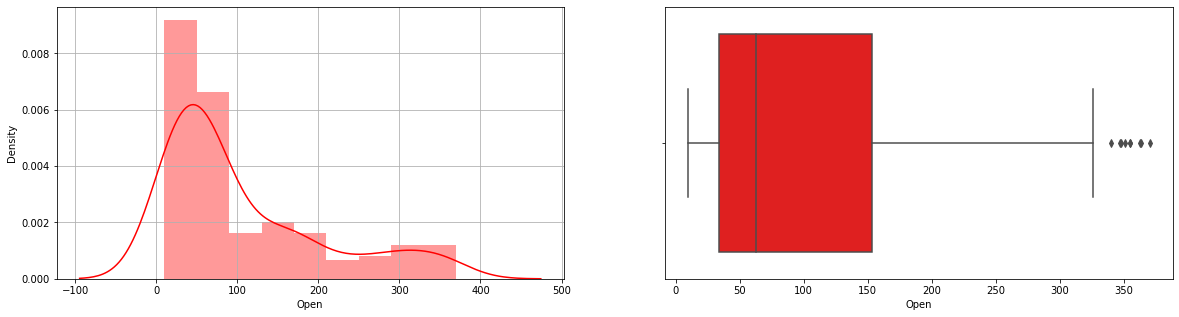

----------------------------------------------------------------------------------------------------------------------------------------------------------------


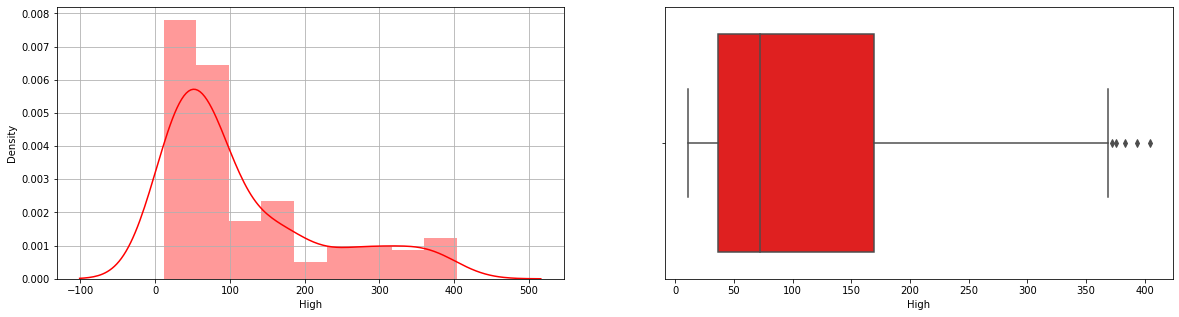

----------------------------------------------------------------------------------------------------------------------------------------------------------------


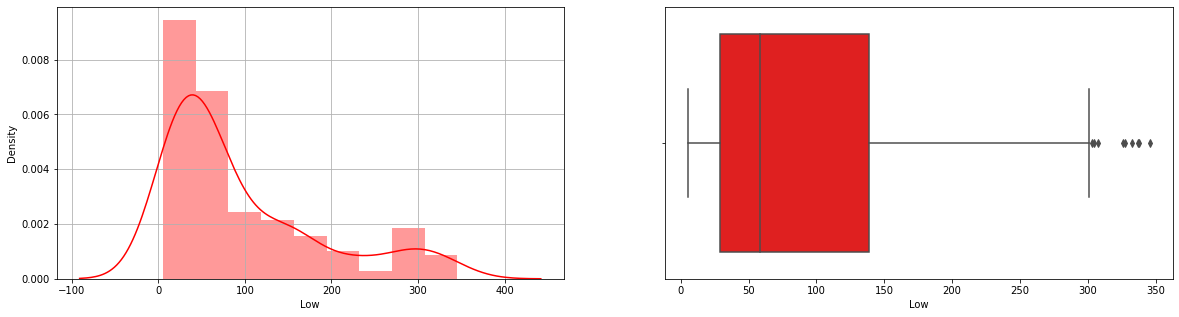

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [38]:
# Lets see the distribution of the data across all the features.
for feature in X:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(df_copy[feature], color='red')
  plt.ylabel('Density')
  plt.grid()
  plt.subplot(122)
  sns.boxplot(df_copy[feature], color='red')
  plt.xlabel(feature)
  plt.show()
  print('-----'*32)

As we can see in above distribution plots that our data is positively skewed for all three features. for proper visualization will use logarithmic transformation in following step. 

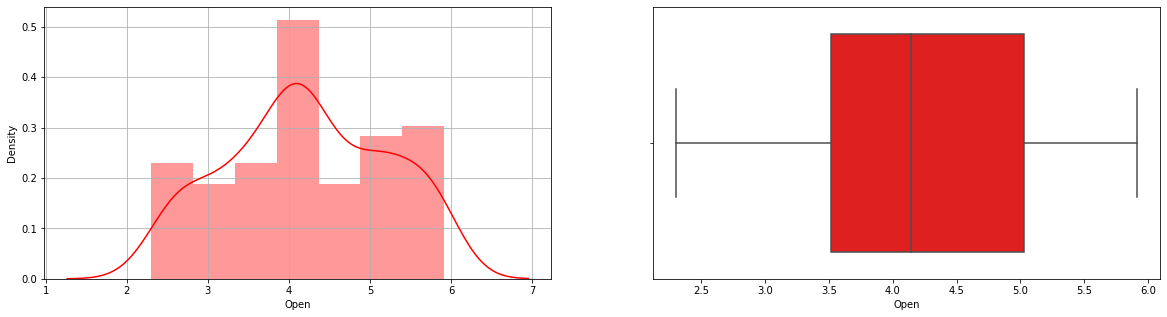

----------------------------------------------------------------------------------------------------------------------------------------------------------------


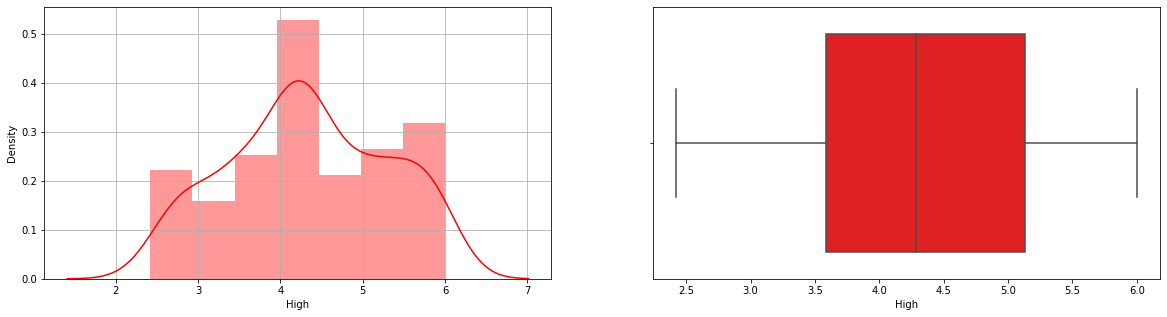

----------------------------------------------------------------------------------------------------------------------------------------------------------------


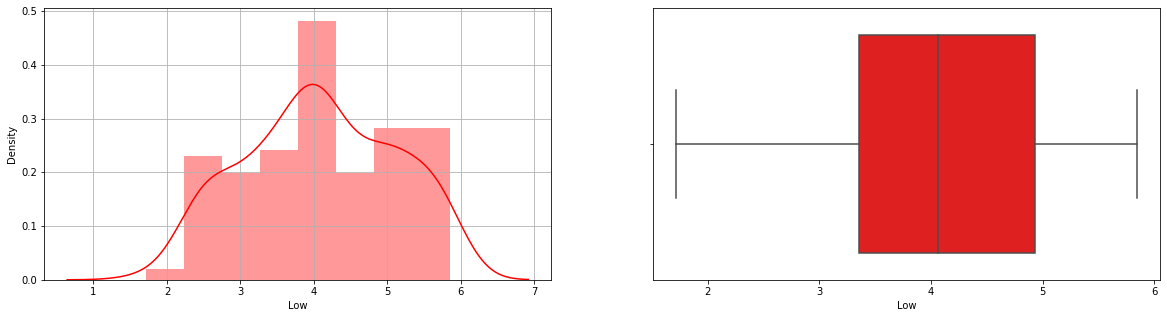

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [44]:
# Applying log transformation in order to normalize the features.
for feature in X:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(np.log(df_copy[feature]), color='red')
  plt.ylabel('Density')
  plt.grid()
  plt.subplot(122)
  sns.boxplot(np.log(df_copy[feature]), color='red')
  plt.xlabel(feature)
  plt.show()
  print('-----'*32)

 Independent variable dataset now seems to be normally dirtributed a bit after log transformation

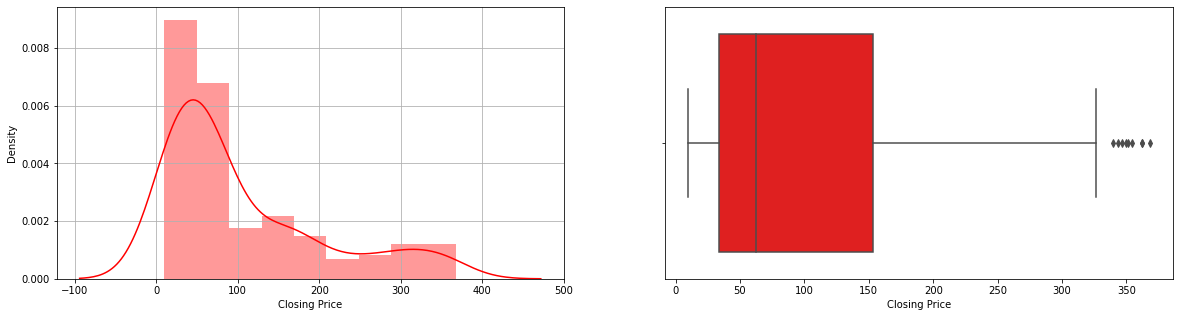

In [46]:
# Now lets see the data distribution of our label(dependent variable).
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df_copy['Close'], color='red')
plt.ylabel('Density')
plt.xlabel('Closing Price')
plt.grid()

plt.subplot(122)
sns.boxplot(df_copy['Close'], color='red')
plt.xlabel('Closing Price')
plt.show()

Dependent variable is also a positively skewed.

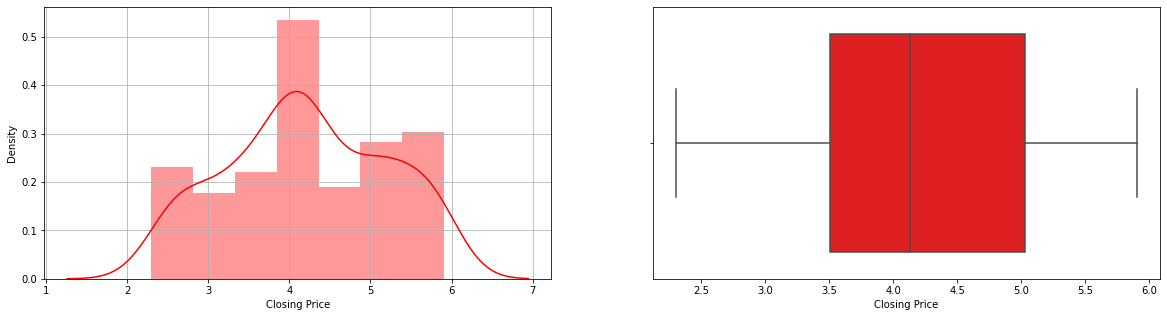

In [47]:
# applying log transformation on dependent variable.
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(np.log(df_copy['Close']), color='red')
plt.ylabel('Density')
plt.xlabel('Closing Price')
plt.grid()

plt.subplot(122)
sns.boxplot(np.log(df_copy['Close']), color='red')
plt.xlabel('Closing Price')
plt.show()

Dependent variable is  now seems to be normally dirtributed after the log transformation.

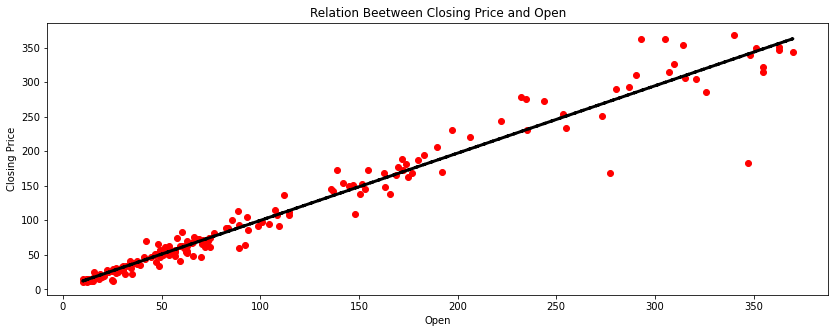

------------------------------------------------------------------------------------------------------------------------


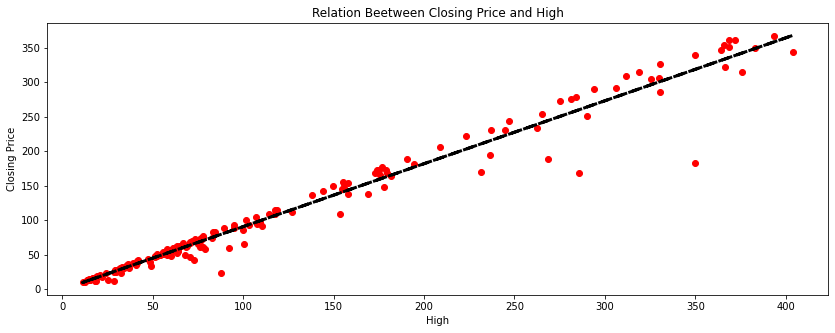

------------------------------------------------------------------------------------------------------------------------


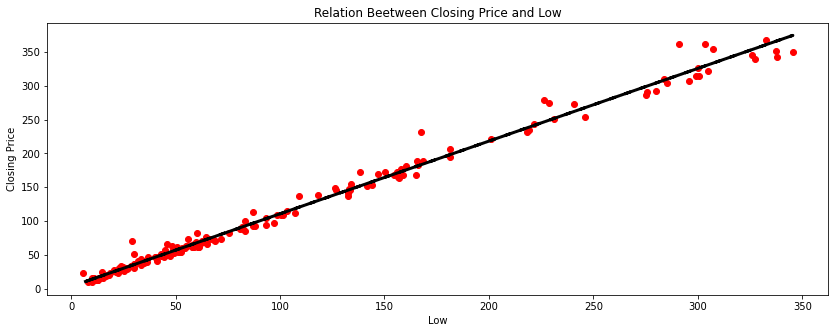

------------------------------------------------------------------------------------------------------------------------


In [19]:
# Now lets do some bivariate analysis.
for i in X:
  plt.figure(figsize=(14,5))
  label = df_copy['Close']
  features = df_copy[i]
  plt.scatter(x=features, y=label, color='Red')
  plt.xlabel(i)
  plt.ylabel('Closing Price')
  plt.title(f'Relation Beetween Closing Price and {i}')
  z = np.polyfit(df_copy[i], df_copy['Close'],1)
  y_hat = np.poly1d(z)(df_copy[i])
  plt.plot(df_copy[i], y_hat, 'r--',lw=3, color='black')
  plt.show()
  print('-----'*24)

Here in above plot we can see that each of the independent variable is having linear relation with the dependent variable.

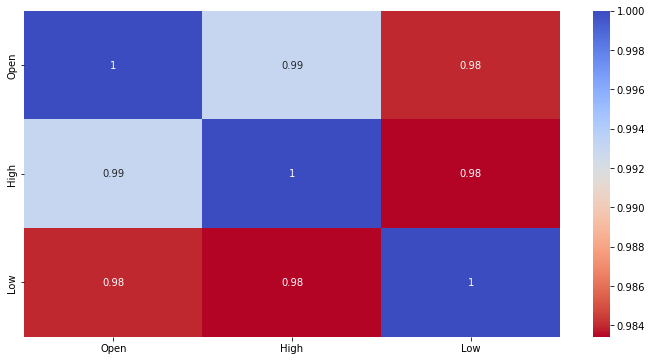

In [20]:
# Lets see is there any correlation between our feratures.

plt.figure(figsize = (12,6))
sns.heatmap(abs(X.corr()), annot=True, cmap = 'coolwarm_r')

As we see all of the independant variables are highly correlated with each other.

In [21]:
# Multicolinearity matrix

def cal_vif(X):
  vif = pd.DataFrame()
  vif['variable'] = X.columns
  vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

cal_vif(X)

,variable,vif
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


As we can see that VIF scores are very high for all our features which means there is a multicolinearity between our independent variables. \

also we know that variable 'Open', 'High', 'Low' all three variables are important for predictions for that reason  I am not performaing any feature engineering here in this case.

In [48]:
x = np.log(df_copy.drop(['Close','Date'], axis=1))
y = np.log(df_copy['Close'])

In [51]:
# Before model implimentation lets first split data into training and testing set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

Using test_size I have splited 80% into train and 20% into test data.


In [53]:
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:

print(x_test.shape)
print(x_train.shape)

(37, 3)
(148, 3)
